In [84]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

**PCA (Principal Component Analysis)** is An important machine learning method for dimensionality reduction.
It is a method that uses simple matrix operations from linear algebra and statistics to calculate a projection of the original data into the same number or fewer dimensions.

n this notebook, I will implement the Principal Component Analysis machine learning algorithm from scratch in Python.

### How PCA work
PCA is an operation applied to a dataset, represented by an n x m matrix A that results in a projection of A which we will call B. Let’s walk through the steps of this operation.
- The first step is to calculate the mean values of each column.
- Next, we need to center the values in each column by subtracting the mean column value.
- The next step is to calculate the covariance matrix of the centered matrix.
- Finally, we calculate the eigendecomposition of the covariance matrix V. This results in a list of eigenvalues and a list of eigenvectors.

The eigenvectors represent the directions or components for the reduced subspace of B, whereas the eigenvalues represent the magnitudes for the directions.

The eigenvectors can be sorted by the eigenvalues in descending order to provide a ranking of the components or axes of the new subspace for A.

Let's see how I will do this in python.

In [180]:
class PCA:
    def __init__(self, n_components=None):
        self.n_components = n_components
    
    def fit(self, data):
        # calculate the mean of each column
        mean = np.mean(data.T, axis=1)
        # center columns by subtracting column means
        center = data - mean
        # calculate covariance matrix of centered matrix
        cov = np.cov(center.T)
        # eigendecomposition of covariance matrix
        values, vectors = np.linalg.eig(cov)
        # sort eigenvectors by the eigenvalues in descending order to provide a ranking of the components
        # use 'argsort' to get the sorted indices of 'values' array, and '[::-1]' to reverse the order 'descending order'
        # then sort 'vectors' matrix accourding to these indices
        vectors = vectors[:, values.argsort()[::-1]]

        self.components_ = vectors
        self.explained_variance_ = np.sort(values)[::-1] # sort the values
        self.explained_variance_ratio_ = self.explained_variance_ / self.explained_variance_.sum()
    
    def transform(self, data):
        # calculate the mean of each column
        mean = np.mean(data.T, axis=1)
        # center columns by subtracting column means
        center = data - mean
        
        # project data
        projection = self.components_.T.dot(center.T)
        
        # if n_components isn't None. return the first n_components principal components
        if self.n_components != None:
            return projection.T[:, :self.n_components]
        # else return the whole projection matrix
        return projection.T
    
    def fit_transform(self, data):
        # calculate the mean of each column
        mean = np.mean(data.T, axis=1)
        # center columns by subtracting column means
        center = data - mean
        # calculate covariance matrix of centered matrix
        cov = np.cov(center.T)
        # eigendecomposition of covariance matrix
        values, vectors = np.linalg.eig(cov)
        # sort eigenvectors by the eigenvalues in descending order to provide a ranking of the components
        # use 'argsort' to get the sorted indices of 'values' array, and '[::-1]' to reverse the order 'descending order'
        # then sort 'vectors' matrix accourding to these indices
        vectors = vectors[:, values.argsort()[::-1]]

        self.components_ = vectors
        self.explained_variance_ = np.sort(values)[::-1] # sort the values
        self.explained_variance_ratio_ = self.explained_variance_ / self.explained_variance_.sum()
        
        # project data
        projection = self.components_.T.dot(center.T)
        
        # if n_components isn't None. return the first n_components principal components
        if self.n_components != None:
            return projection.T[:, :self.n_components]
        # else return the whole projection matrix
        return projection.T
        

In [143]:
from sklearn.datasets import load_wine
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = pd.Series(data.target)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [144]:
df.shape

(178, 14)

In [159]:
features = df.columns[0:13] # grab all numeric columns of interest
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

In [176]:
pca = PCA()
pca.fit(df[features])
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [172]:
pcaDF = pd.DataFrame({'pc': range(1,14), 'expl_var' : pca.explained_variance_ratio_,  'cum_var': pca.explained_variance_ratio_.cumsum()})
pcaDF.set_index('pc')

,expl_var,cum_var
pc,,
1,0.361988,0.361988
2,0.192075,0.554063
3,0.111236,0.665300
4,0.070690,0.735990
5,0.065633,0.801623
6,0.049358,0.850981
7,0.042387,0.893368
8,0.026807,0.920175
9,0.022222,0.942397


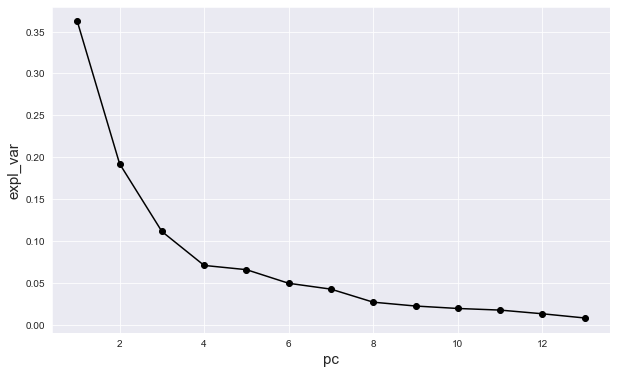

In [173]:
plt.figure(figsize=(10, 6))
plt.plot(pcaDF['pc'], pcaDF['expl_var'], '-ok')
plt.xlabel('pc', fontsize=15)
plt.ylabel('expl_var', fontsize=15);

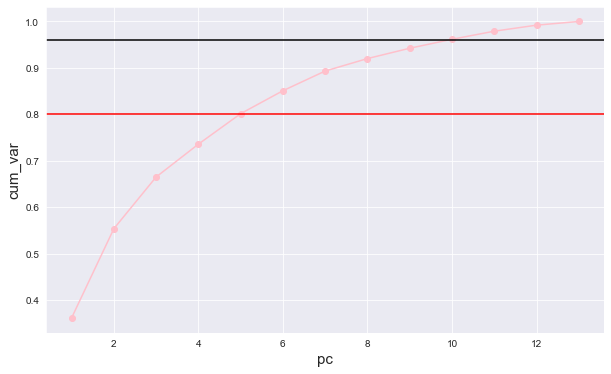

In [174]:
plt.figure(figsize=(10, 6))
plt.plot(pcaDF['pc'], pcaDF['cum_var'], '-o', color='pink')
plt.axhline(y=0.96, color='k')
plt.axhline(y=0.8, color='r')
plt.xlabel('pc', fontsize=15)
plt.ylabel('cum_var', fontsize=15);

- If we take the first 10 principal component, we will lose 4% only from the original data.
- If we take the first 5 principal component only, we will have 80 % from our original data.

- we can see how PCA reduce the dimensions with small lose of the data